<a href="https://colab.research.google.com/github/Simarjit1303/Data-Science/blob/main/exercises/machine-learning/unsupervised-learning/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering
You should build an end-to-end machine learning pipeline using a clustering model. In particular, you should do the following:
- Load the `customers` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Choose a few clustering algorithms, such as [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [hdbscan](https://hdbscan.readthedocs.io/en/latest/), and [agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).
- Train and evaluate clustering models (i.e., the clustering algorithm and its hyperparameters) to find out the best-performing model using clustering evaluation metrics, such as [elbow method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) and the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [34]:
# Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, HDBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist


# Data Exploration

In [35]:
# Load the Dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/customers.csv')

# Display the first five rows of the dataset
dataset.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [36]:
# checking the datatypes of dataset
print(dataset.dtypes)
# Checking for missing values
dataset.isnull().sum()

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object


,0
ID,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


# Data Preprocessing

In [37]:
# Preprocessing data
dataset.drop(['ID'], axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


# Feature Scalling(tried but score is low so no scalling)

In [38]:
# Scalling our data using standard scaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(dataset)

# Data Modelling using k-means, hdbscan, and agglomerative clustering

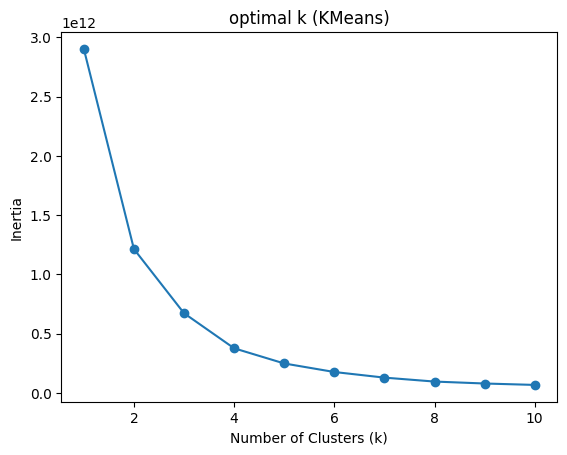

In [39]:
# 1. K-means Clustering
inertia_values = []
for k in range(1, 11):
  Kmean_Model = KMeans(n_clusters=k, random_state=42, n_init="auto")
  Kmean_Model.fit(dataset)
  inertia_values.append(Kmean_Model.inertia_)  # Storing inertia values

# Plot the Elbow Curve
plt.plot(range(1, 11), inertia_values,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('optimal k (KMeans)')
plt.show()

In [40]:
# Based on my elbow plot, I choose k = 4.
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto") #Added n_init="auto"
kmeans_labels = kmeans.fit_predict(dataset)
kmeans_silhouette = silhouette_score(dataset, kmeans_labels)
print(f"K-means Silhouette Score: {kmeans_silhouette}")

K-means Silhouette Score: 0.5429921618470235


In [41]:
# 2. HDBSCAN Clustering
best_silhouette = -1  # Initialize with a low value
best_params = {}

for min_cluster_size in [5, 10, 15]:
    for min_sample_size in [None, 5, 10]:
        hdbscan_clusterer = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_sample_size)
        hdbscan_labels = hdbscan_clusterer.fit_predict(dataset)

        # Evaluate (Silhouette Score - Improved)
        clustered_indices = hdbscan_labels != -1
        if np.sum(clustered_indices) > 1:
            hdbscan_silhouette = silhouette_score(dataset[clustered_indices], hdbscan_labels[clustered_indices])


            # Update best parameters if current score is better
            if hdbscan_silhouette > best_silhouette:
                best_silhouette = hdbscan_silhouette
                best_params = {'min_cluster_size': min_cluster_size, 'min_samples': min_sample_size}

# Print only the best score and parameters at the end
print(f"Best HDBSCAN Parameters: {best_params}")
print(f"Best Silhouette Score: {best_silhouette}")

Best HDBSCAN Parameters: {'min_cluster_size': 15, 'min_samples': None}
Best Silhouette Score: 0.6519500708883206


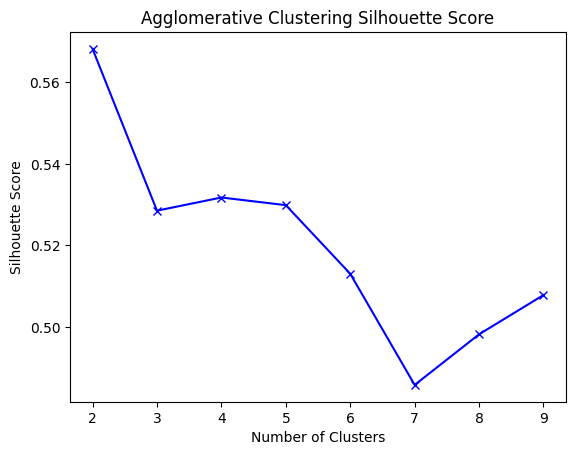

Agglomerative Clustering Best Silhouette Score (k=2): 0.5682214238395729


In [42]:
# 3. Agglomerative Clustering
silhouette_scores_agg = []
K_agg = range(2, 10)
for k in K_agg:
    agg_clusterer = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg_clusterer.fit_predict(dataset)
    silhouette_scores_agg.append(silhouette_score(dataset, agg_labels))

plt.plot(K_agg, silhouette_scores_agg, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative Clustering Silhouette Score')
plt.show()

best_k_agg = K_agg[np.argmax(silhouette_scores_agg)]
best_agg_clusterer = AgglomerativeClustering(n_clusters=best_k_agg)
best_agg_labels = best_agg_clusterer.fit_predict(dataset)
best_agg_silhouette = silhouette_scores_agg[np.argmax(silhouette_scores_agg)]

print(f"Agglomerative Clustering Best Silhouette Score (k={best_k_agg}): {best_agg_silhouette}")

In [43]:
# Choose the best model
best_model = None
best_silhouette = -1  # Initialize with a low value

if kmeans_silhouette > best_silhouette:
    best_silhouette = kmeans_silhouette
    best_model = "K-means"

if hdbscan_silhouette > best_silhouette:
    best_silhouette = hdbscan_silhouette
    best_model = "HDBSCAN"

if best_agg_silhouette > best_silhouette:
    best_silhouette = best_agg_silhouette
    best_model = "Agglomerative Clustering"

print(f"\nBest Model: {best_model}")
print(f"Best Silhouette Score: {best_silhouette}")


Best Model: HDBSCAN
Best Silhouette Score: 0.590418310197103
